In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,0,0)loss0-30-0delay50bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

In [3]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(1,0,0)loss0-30-0delay50bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [4]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(0.5,0,0)loss0-30-0delay50bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [5]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_1['_1_rawVideoTimestamp']
timestamps_2 = df_data_2['_1_rawVideoTimestamp']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_1['_8_totalTime']
total_time_2 = df_data_2['_8_totalTime']

# Extract the first index values for the other metrics
metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_render_time_difference_key_frame_preceding', 'avg_render_time_difference_key_frame_consecutive',
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_stall_duration_key_frame_preceding',
           'avg_stall_duration_key_frame_consecutive', 'avg_i_frames', 'avg_rendered_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

# Initialize dictionary to store metric values
metric_values = {metric: [] for metric in metrics}

# Extract values for each dataframe
for df in [df_data_0, df_data_1, df_data_2]:
    for metric in metrics:
        metric_values[metric].append(df[metric].iloc[0])

# Metrics Comparison
print("\n=== Metrics Comparison ===")
for metric in metrics:
    values = metric_values[metric]
    print("{}: {:.2f} vs {:.2f} vs {:.2f}".format(
        metric, values[0], values[1], values[2]
    ))


=== Metrics Comparison ===
avg_total_frames: 1793.67 vs 1799.67 vs 1800.00
avg_received_frames: 1759.67 vs 1702.67 vs 1680.33
avg_rendered_frames: 1751.00 vs 1684.67 vs 1646.00
avg_percentage_received_frames: 98.10 vs 94.61 vs 93.35
avg_skipped_frames: 42.67 vs 115.00 vs 154.00
avg_render_time_difference: 34.27 vs 35.62 vs 36.46
avg_render_time_difference_key_frame_preceding: 112.89 vs 134.71 vs 130.26
avg_render_time_difference_key_frame_consecutive: 24.84 vs 26.30 vs 24.18
avg_num_of_stall_events: 459.67 vs 417.00 vs 382.00
avg_stall_duration: 13794.67 vs 14443.33 vs 15854.67
avg_stall_duration_key_frame_preceding: 2262.00 vs 5774.33 vs 10628.67
avg_stall_duration_key_frame_consecutive: 89.33 vs 286.67 vs 366.33
avg_i_frames: 29.00 vs 58.00 vs 112.67
avg_rendered_i_frames: 29.00 vs 57.67 vs 111.67
avg_gop_size_frames: 60.85 vs 30.03 vs 14.98
avg_gop_size_time: 2.07 vs 1.03 vs 0.53
avg_total_time: 160.66 vs 156.40 vs 149.09
avg_25th_percentile_total_time: 108.67 vs 108.00 vs 107.67
a

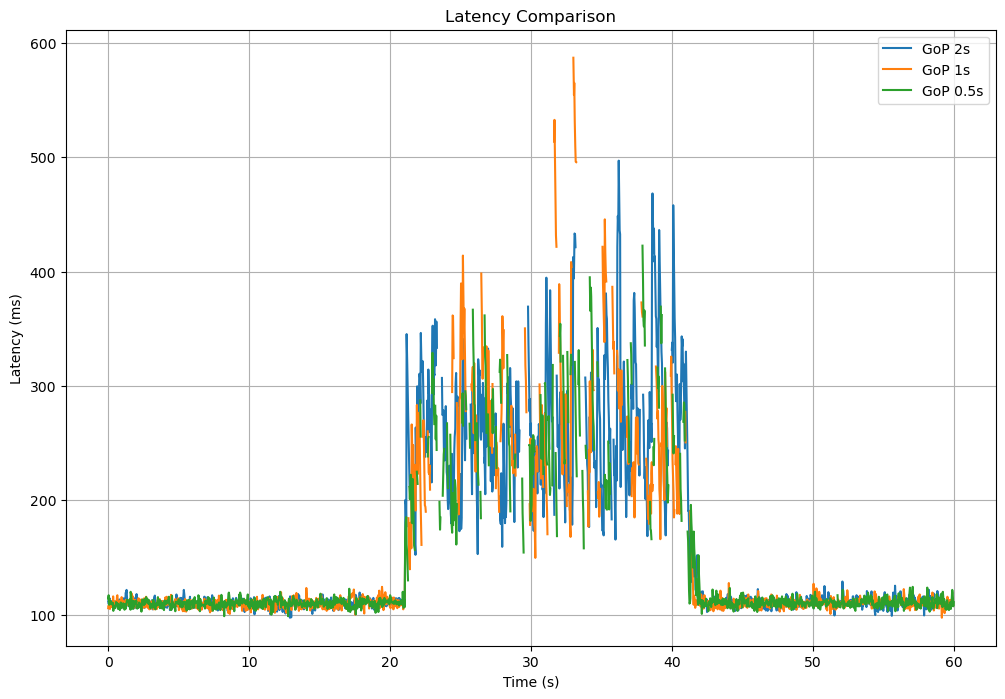

In [6]:
# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 1  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='GoP 2s')
plt.plot(timestamps_1, smoothed_1, label='GoP 1s')
plt.plot(timestamps_2, smoothed_2, label='GoP 0.5s')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
